In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.6 MB/s eta 0:00:0000:0100:01m


In [3]:
import numpy as np # linear algebra
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/abc/Desktop/dress.csv')

print(display(df))

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...,...
29992,29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


None


In [7]:
print(df['Brand'].nunique())
print(df['Colour'].nunique())

931
20


In [8]:
# filter brands out with insufficent listings
brand_counts = df['Brand'].value_counts()
filtered_df = df[df['Brand'].isin(brand_counts[brand_counts >= 100].index)]

# filter out price outliers 
filtered_df = filtered_df.loc[filtered_df['Price'] < 200]

#filter colours out with too few listings
colour_counts = filtered_df['Colour'].value_counts()
filtered_df = filtered_df[filtered_df['Colour'].isin(colour_counts[colour_counts >= 100].index)]

# remaining data properties: 
print('Number of unique Brands: ' + str(filtered_df['Brand'].nunique()))
print(filtered_df['Colour'].value_counts())
print('Remaining listings; ' + str(len(filtered_df)))

Number of unique Brands: 47
Colour
black     2998
multi     2843
blue      2503
pink      2292
green     2053
red       1612
white     1527
beige      719
yellow     623
purple     586
navy       547
orange     460
brown      442
cream      343
gold       277
silver     218
Name: count, dtype: int64
Remaining listings; 20043


In [9]:
# keep only needed features
filtered_df = filtered_df[['Brand', 'Colour', 'Price']]

In [10]:
# archive dataframe before encoding
archive_df = filtered_df

# One-hot encoding
filtered_df = pd.get_dummies(filtered_df, columns=['Brand', 'Colour'], drop_first=True)

X = filtered_df.drop(columns=['Price'])
y = filtered_df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df['Residuals'] = comparison_df['Actual'] - comparison_df['Predicted']

Mean Squared Error: 352.50528098993004


In [13]:
def plotComparison(dataframe):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=dataframe)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
def plotResidual(dataframe):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Residuals', data=dataframe)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Actual Values')
    plt.show()

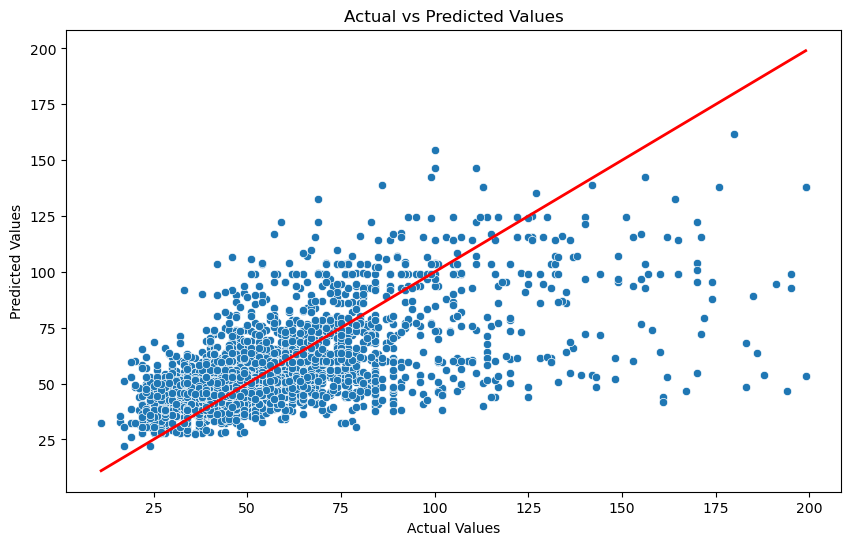

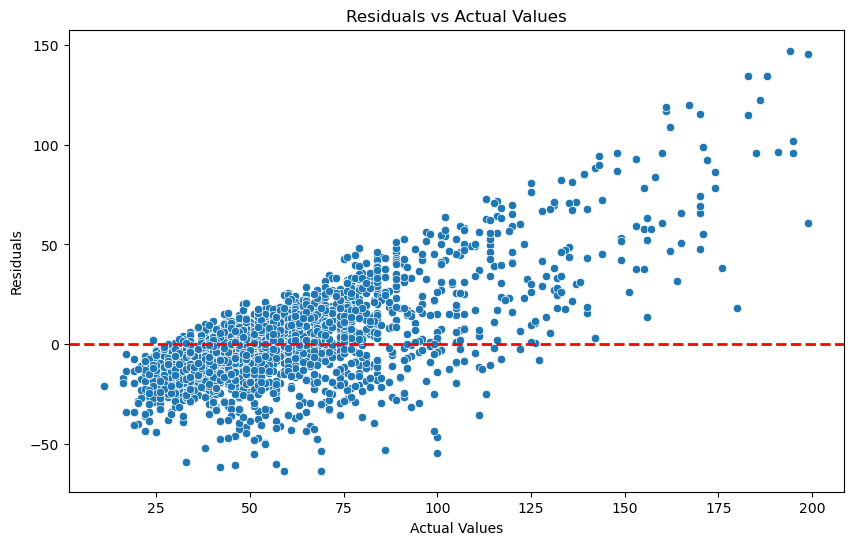

In [14]:
plotComparison(comparison_df)
plotResidual(comparison_df)

Clearly need additional features for accurate prediction¶
Unsuprisingly just brand and colour appear insufficent for price predictions. Trends in the residuals clearly show effects not being accounted for.

There are a two major effects currently not being accounted for

Brands will have a range of prices
Market effects of the number of listings of similar dresses pushing prices up or down
I will pick up looking at these when I get time, in the order listed

In [15]:
def plotHistogram(df_column_name, bin_num=10, title='Histogram'):
    plt.figure(figsize=(8, 6))
    plt.hist(df_column_name, bins=bin_num, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

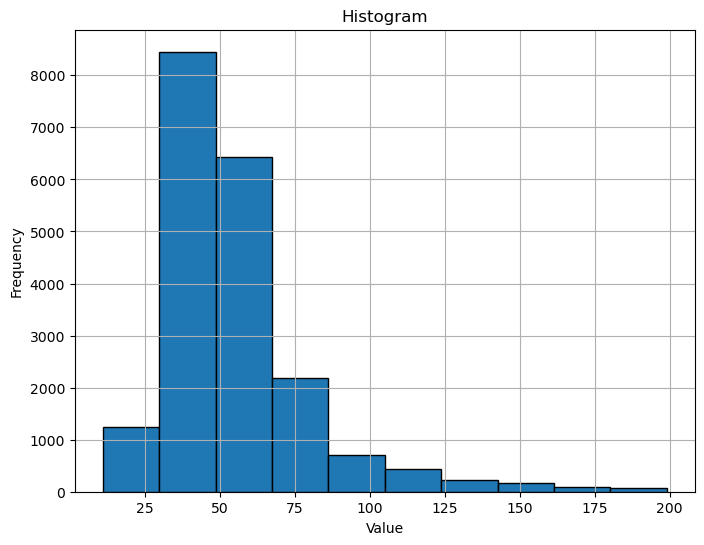

In [16]:
plotHistogram(filtered_df['Price'])

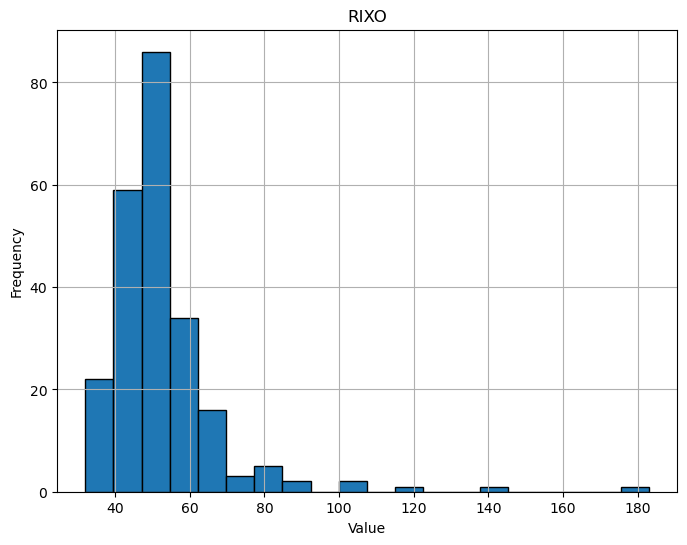

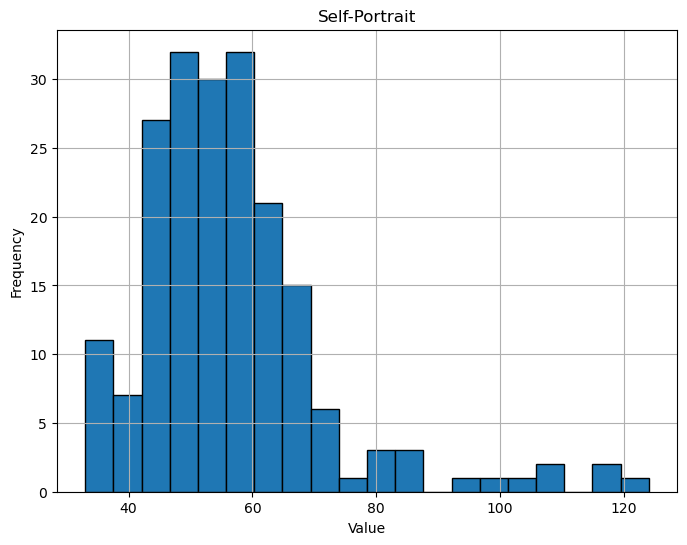

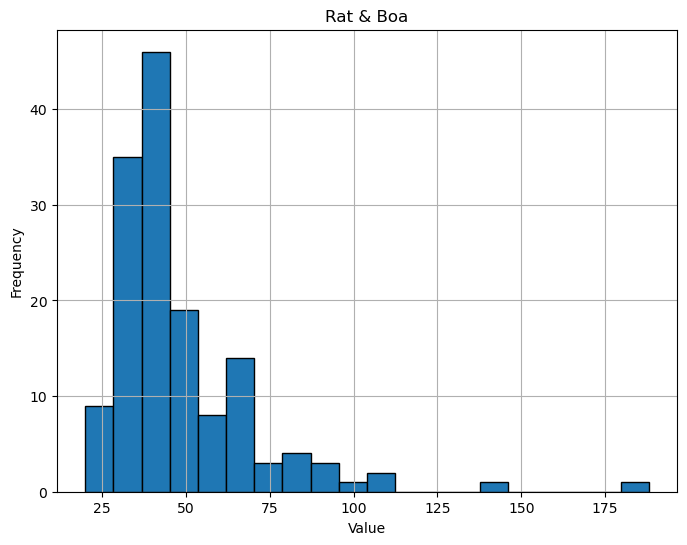

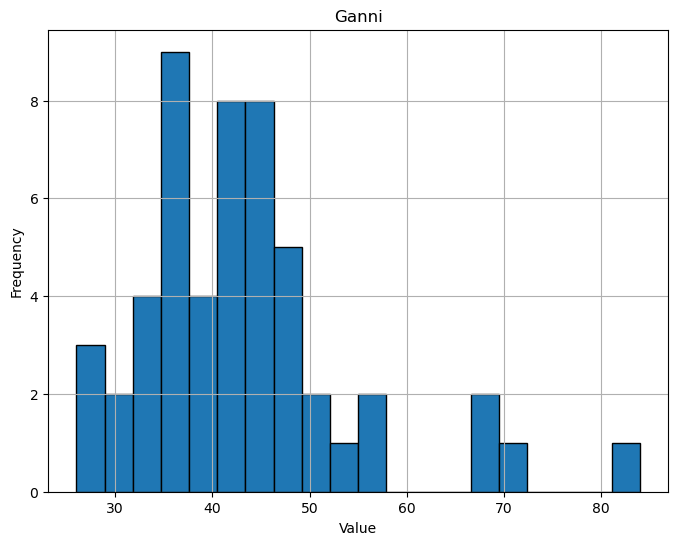

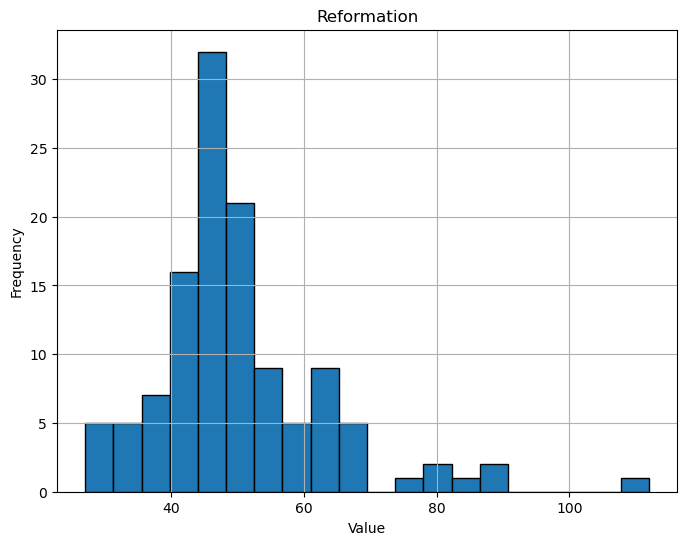

In [17]:
top_brands =  brand_counts.head(5).index.tolist()

for brand in top_brands:
    temp_df = archive_df.loc[archive_df['Brand'] == brand]
    temp_df = temp_df.loc[temp_df['Colour'] == 'red']
    plotHistogram(temp_df['Price'], 20, brand)